# Assignment 7

## Question 1

### 1.3

In [39]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.moment_helpers import cov2corr
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [19]:
DowJones = yf.download("AXP PG V IBM MMM WMT WBA JNJ MRK CAT VZ CRM KO MCD CSCO GS AAPL BA MSFT JPM HD HON INTC CVX NKE TRV DIS UNH AMGN GE", start="2018-01-01", interval="1d")

[*********************100%***********************]  30 of 30 completed


In [20]:
DowJones = DowJones["Adj Close"].dropna()
DowJones

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,GE,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,41.105534,162.384338,94.424980,282.886383,145.002594,104.410004,35.458939,111.714676,108.726067,16.675669,...,51.873783,82.383636,61.536419,83.115784,123.456062,211.113892,112.335358,46.974339,67.955437,93.182022
2018-01-03,41.098373,165.448532,95.007141,283.801239,145.224197,105.290001,35.741806,112.529007,109.192856,16.833340,...,51.799969,82.767044,61.526726,83.014915,123.848961,213.328491,113.453690,46.009060,68.463173,93.994858
2018-01-04,41.289268,164.751297,96.587410,282.724396,147.218613,106.680000,35.842930,112.178757,109.144241,17.185772,...,52.639614,83.495522,61.487953,83.601715,123.848961,214.254440,113.875534,46.158237,64.918068,94.079918
2018-01-05,41.759361,165.732895,96.807686,294.322296,149.545471,108.099998,36.339340,111.994865,108.551003,17.195045,...,52.584251,84.530701,62.011341,83.656731,123.624466,218.339996,116.602753,46.052937,66.114876,94.637550
2018-01-08,41.604263,165.687073,95.916985,295.570740,153.303497,108.860001,36.716248,112.546539,106.994995,16.953909,...,52.279762,84.616966,62.563805,84.096848,122.960297,214.550339,117.073624,45.973961,66.958084,96.036369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-02,123.080002,226.559998,122.330002,223.850006,173.869995,220.779999,43.889999,89.870003,153.610001,10.430000,...,81.830002,215.369995,135.307770,138.360001,134.039993,346.314026,210.179993,61.360001,39.840000,150.520004
2020-12-03,122.940002,226.910004,123.120003,237.199997,174.630005,220.970001,44.110001,89.800003,153.240005,10.600000,...,81.449997,214.240005,136.684998,137.339996,135.089996,347.429993,208.050003,61.740002,42.820000,149.300003
2020-12-04,122.250000,229.210007,125.040001,232.710007,182.210007,225.860001,44.380001,93.279999,154.139999,10.880000,...,81.940002,214.360001,137.190002,137.470001,136.160004,349.890015,212.679993,61.549999,43.410000,148.910004


In [21]:
columns = list(DowJones.columns)

for cols in columns:
    DowJones[cols] = (DowJones[cols]/DowJones[cols].shift())-1

In [22]:
DowJones.dropna(inplace = True)

In [23]:
corr_matrix = cov2corr(np.cov(DowJones, rowvar = False))
pd.DataFrame(corr_matrix)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.000000,0.528249,0.501619,0.442815,0.516580,0.605461,0.639088,0.458250,0.500644,0.363965,...,0.469439,0.774255,0.538282,0.476478,0.430894,0.544456,0.685126,0.348569,0.381477,0.420649
1,0.528249,1.000000,0.416090,0.272244,0.474112,0.462579,0.560762,0.415826,0.415033,0.297751,...,0.632057,0.610983,0.404869,0.531024,0.431590,0.554706,0.547958,0.450398,0.433674,0.468488
2,0.501619,0.416090,1.000000,0.691801,0.636273,0.432717,0.585344,0.743636,0.713690,0.578158,...,0.448386,0.566307,0.588116,0.418092,0.676871,0.583599,0.771825,0.419804,0.472448,0.275436
3,0.442815,0.272244,0.691801,1.000000,0.554266,0.378510,0.464399,0.631676,0.576298,0.560242,...,0.338801,0.458299,0.523611,0.311402,0.560005,0.461500,0.596263,0.314998,0.379271,0.196262
4,0.516580,0.474112,0.636273,0.554266,1.000000,0.431617,0.609352,0.619258,0.568011,0.535344,...,0.428347,0.550416,0.564992,0.397390,0.527598,0.492403,0.637157,0.397949,0.494600,0.330361
5,0.605461,0.462579,0.432717,0.378510,0.431617,1.000000,0.544539,0.378467,0.432810,0.286711,...,0.431698,0.735883,0.483029,0.340148,0.406372,0.458858,0.667125,0.272374,0.263694,0.330890
6,0.639088,0.560762,0.585344,0.464399,0.609352,0.544539,1.000000,0.537381,0.582677,0.432714,...,0.528693,0.710688,0.562316,0.515186,0.475816,0.532852,0.691086,0.465092,0.512405,0.436151
7,0.458250,0.415826,0.743636,0.631676,0.619258,0.378467,0.537381,1.000000,0.594842,0.552364,...,0.481810,0.523939,0.527977,0.364156,0.637049,0.575986,0.680434,0.401378,0.401585,0.250815
8,0.500644,0.415033,0.713690,0.576298,0.568011,0.432810,0.582677,0.594842,1.000000,0.459973,...,0.385297,0.556175,0.562308,0.411880,0.509641,0.468270,0.675603,0.387908,0.416117,0.314686
9,0.363965,0.297751,0.578158,0.560242,0.535344,0.286711,0.432714,0.552364,0.459973,1.000000,...,0.337427,0.373153,0.450340,0.297657,0.487060,0.387139,0.480631,0.304411,0.415603,0.175574


In [24]:
X_std = StandardScaler().fit_transform(DowJones)

In [25]:
pca=PCA()

In [26]:
pca.fit(X_std)

PCA()

In [27]:
results = pd.DataFrame(np.array([pca.components_[0],pca.components_[1]]), index=["PC1", "PC2"]).transpose()

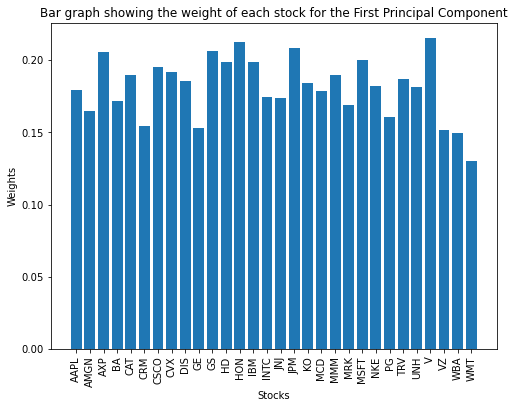

In [28]:
plt.figure(figsize=(8,6));
plt.bar(list(DowJones.columns), results["PC1"]*-1);
plt.xticks(rotation = 90);
plt.ylabel("Weights");
plt.xlabel("Stocks");
plt.title("Bar graph showing the weight of each stock for the First Principal Component");

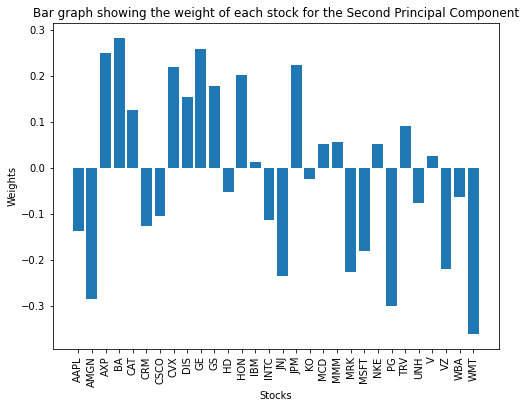

In [29]:
plt.figure(figsize=(8,6));
plt.bar(list(DowJones.columns), results["PC2"]*-1);
plt.xticks(rotation = 90);
plt.ylabel("Weights");
plt.xlabel("Stocks");
plt.title("Bar graph showing the weight of each stock for the Second Principal Component");

### 1.4

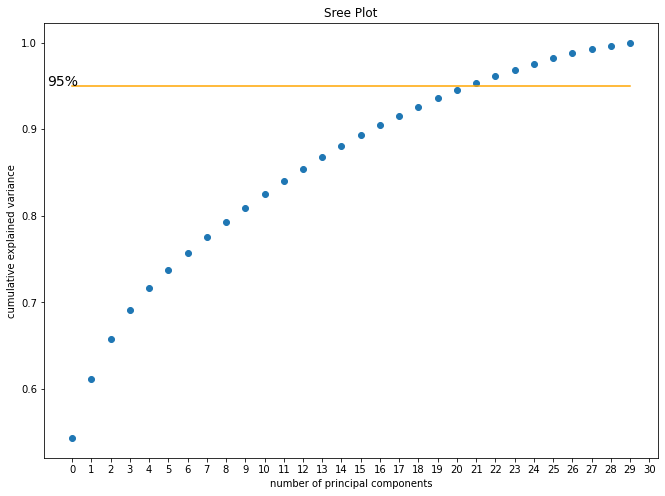

In [30]:
plt.figure(figsize=(11,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'o')
plt.xlabel('number of principal components')
plt.ylabel('cumulative explained variance')
plt.xticks(np.arange(0, 31, 1))
plt.plot((0, 29), (0.95, 0.95), "orange")
plt.text(-1.3, 0.95, "95%", fontsize = 14)
plt.title("Sree Plot")
plt.show()

### 1.5

Mean of PC1: -0.181417 ; Mean of PC2: 0.011025


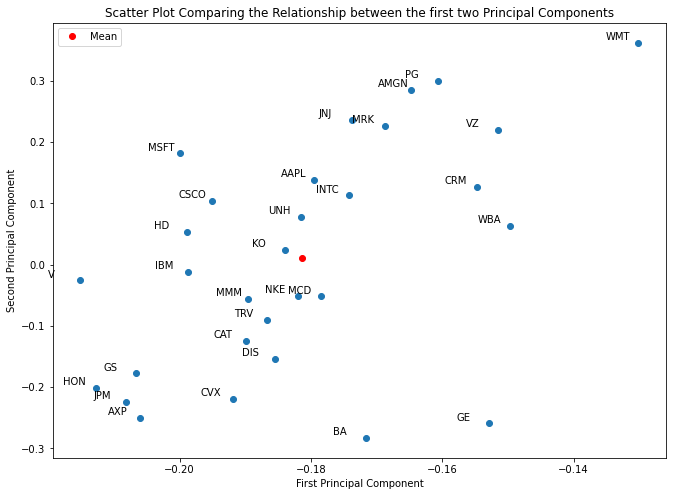

In [31]:
pc1_mean, pc2_mean = results["PC1"].mean(), results["PC2"].mean()
print("Mean of PC1: %2f ; Mean of PC2: %2f" %(pc1_mean, pc2_mean))


plt.figure(figsize=(11,8))

label = list(DowJones.columns)
for i, txt in enumerate(label):
    plt.annotate(txt, (results["PC1"][i], results["PC2"][i]), 
                 xytext = ((results["PC1"][i]-0.005) , (results["PC2"][i]+0.005)))

plt.plot(pc1_mean, pc2_mean, "o", color = "r", label = "Mean")
plt.plot(results["PC1"], results["PC2"], "o")
plt.title("Scatter Plot Comparing the Relationship between the first two Principal Components")
plt.ylabel("Second Principal Component")
plt.xlabel("First Principal Component")
plt.legend()
plt.show()

In [32]:
results["Euclidean Distance"] = ((results["PC1"] - pc1_mean)**2 + (results["PC2"] - pc2_mean)**2)**(1/2)

In [33]:
results.set_index(DowJones.columns)

,PC1,PC2,Euclidean Distance
AAPL,-0.179568,0.137862,0.126851
AMGN,-0.164834,0.285756,0.275231
AXP,-0.205964,-0.250188,0.262364
BA,-0.171631,-0.283150,0.294338
CAT,-0.189832,-0.125182,0.136466
CRM,-0.154696,0.127174,0.119183
CSCO,-0.195086,0.104274,0.094245
CVX,-0.191823,-0.219214,0.230474
DIS,-0.185445,-0.153486,0.164560
GE,-0.152829,-0.259158,0.271691


In [34]:
results[["Euclidean Distance"]].sort_values(by ="Euclidean Distance", ascending=False )

,Euclidean Distance
29,0.355002
3,0.294338
23,0.289499
1,0.275231
9,0.271691
2,0.262364
16,0.236643
7,0.230474
15,0.225381
20,0.215940


In [35]:
DowJones.columns[29], DowJones.columns[3], DowJones.columns[23]

('WMT', 'BA', 'PG')

## Question 2

### 2.3

In [41]:
pairwise = sklearn.metrics.pairwise_distances(corr_matrix)
pd.DataFrame(pairwise).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.000000,0.832488,1.121217,1.098075,0.916326,0.713839,0.630423,1.056038,0.911259,1.239496,...,0.934799,0.490819,0.776484,1.017828,1.016001,0.749912,0.816564,1.208076,1.148568,1.261160
1,0.832488,0.000000,1.377117,1.333676,1.092785,0.938404,0.875514,1.234109,1.146731,1.301823,...,0.598717,0.905796,1.040717,0.758563,1.092977,0.785315,1.191336,0.902571,0.963934,0.981163
2,1.121217,1.377117,0.000000,0.739536,0.702721,1.392795,0.921202,0.466540,0.595227,1.084884,...,1.272569,1.053153,0.829287,1.432978,0.680995,0.934023,0.637577,1.455196,1.339132,1.841317
3,1.098075,1.333676,0.739536,0.000000,0.801812,1.196102,1.077063,0.649778,0.696983,0.731676,...,1.231385,1.218442,0.808708,1.339346,0.780637,0.977102,1.039437,1.303965,1.135481,1.603566
4,0.916326,1.092785,0.702721,0.801812,0.000000,1.178842,0.718226,0.655559,0.680576,0.933830,...,1.094867,0.950159,0.718966,1.218665,0.788873,0.851670,0.795128,1.248247,1.043895,1.545427


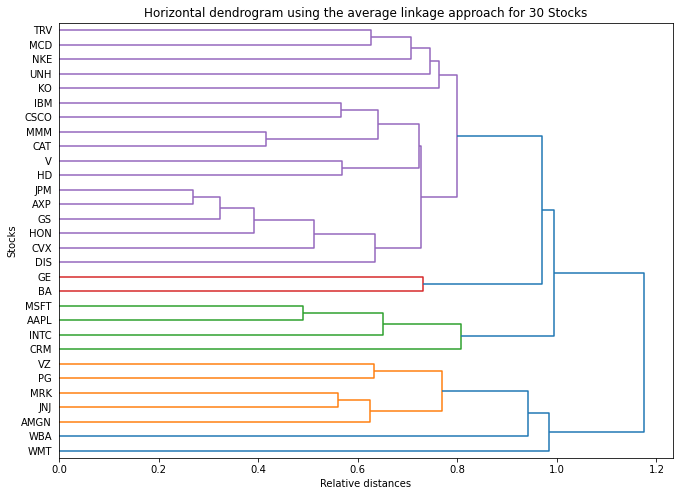

In [42]:
links = hierarchy.linkage(corr_matrix, method='average')
plt.figure(figsize = (11,8))
hierarchy.dendrogram(links, orientation='right', labels = list(DowJones.columns))
plt.xlabel("Relative distances")
plt.ylabel("Stocks")
plt.title("Horizontal dendrogram using the average linkage approach for 30 Stocks")
plt.show()

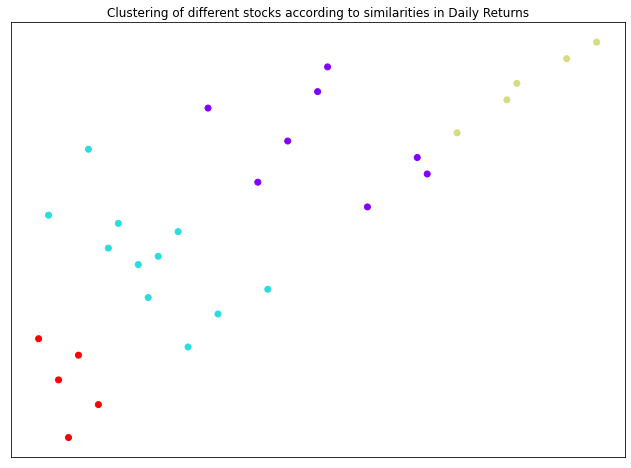

In [43]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')
cluster.fit_predict(links)
plt.figure(figsize = (11,8))
plt.scatter(links[:,0],links[:,1], c=cluster.labels_, cmap='rainbow')
plt.title("Clustering of different stocks according to similarities in Daily Returns")
plt.xticks([])
plt.yticks([])

#label = list(DowJones.columns)
#for i, txt in enumerate(label):
#    plt.annotate(txt, (links[:,0][i-1], links[:,1][i-1]), 
#                 xytext = ((links[:,0][i-1]-0.005) , (links[:,1][i-1]+0.005)))
#

plt.show()

## Question 3

### 3.4

In [44]:
titanic = pd.read_csv("titanic3.csv")
titanic.loc[(titanic.sex == "female"), "Sex"] = 0
titanic.loc[(titanic.sex == "male"), "Sex"] = 1
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Sex
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0.0
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1.0
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0.0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1.0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0.0


In [45]:
titanic = titanic[["pclass", "Sex", "age", "survived"]].dropna()

feature_cols = ["pclass", "Sex", "age"]
X = titanic[feature_cols]
y = titanic.survived

In [240]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110, 120],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': np.arange(100, 500, 10)
}
rf = RandomForestClassifier()

In [241]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)

In [242]:
grid_search.fit(X, y)

Fitting 10 folds for each of 3600 candidates, totalling 36000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 24.2min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed: 27.1min
[Parallel(n_jobs=-1)]: Done 6829 tasks      | elapsed: 30.1min
[Parallel(n_jobs=-1)]: Done 7922 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done 9097 tasks      | e

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_depth': [80, 90, 100, 110, 120],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220,
       230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350,
       360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480,
       490])},
             verbose=2)

In [243]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 120}

In [46]:
rf_classifier = RandomForestClassifier(random_state=0, bootstrap= True,
 max_depth= 90,
 max_features= 2,
 min_samples_leaf= 3,
 min_samples_split= 8,
 n_estimators= 120)

In [47]:
rf_classifier.fit(X, y)
rf_classifier.score(X, y)

0.8451242829827916

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

RanFC = RandomForestClassifier(random_state=0, bootstrap= True, max_depth= 90, max_features= 2, min_samples_leaf= 3, min_samples_split= 8, n_estimators= 120)

RanFC.fit(X_train, y_train)
y_predRF = RanFC.predict_proba(X_test)
y_predRF = y_predRF[:,1]

aucRF = roc_auc_score(y_test,y_predRF)
RFC_fp, RFC_tp, _tp = roc_curve(y_test,y_predRF)

#Decision Tree 
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.003) 
clf.fit(X_train, y_train)
y_predclf = clf.predict_proba(X_test)
y_predclf = y_predclf[:,1]

aucClf = roc_auc_score(y_test,y_predclf)
clf_fp, clf_tp, _tp = roc_curve(y_test,y_predclf)


#Logistic Regression
LR = LogisticRegression(random_state = 0)
LR.fit(X_train, y_train)
y_predLR = LR.predict_proba(X_test)
y_predLR = y_predLR[:,1]

aucLR = roc_auc_score(y_test,y_predLR)
LR_fp, LR_tp, _tp = roc_curve(y_test,y_predLR)


#KNN Classifier 
scaler = StandardScaler()
scaler.fit(X_train)
X_std = scaler.transform(X_train)
KNN = KNeighborsClassifier(n_neighbors = 6) 
KNN.fit(X_std,y_train)
scaler.fit(X_test)
X_test_std = scaler.transform(X_test)
y_predKNN = KNN.predict_proba(X_test_std)
y_predKNN = y_predKNN[:,1]

aucKNN = roc_auc_score(y_test,y_predKNN)
KNN_fp, KNN_tp, _tp = roc_curve(y_test,y_predKNN)

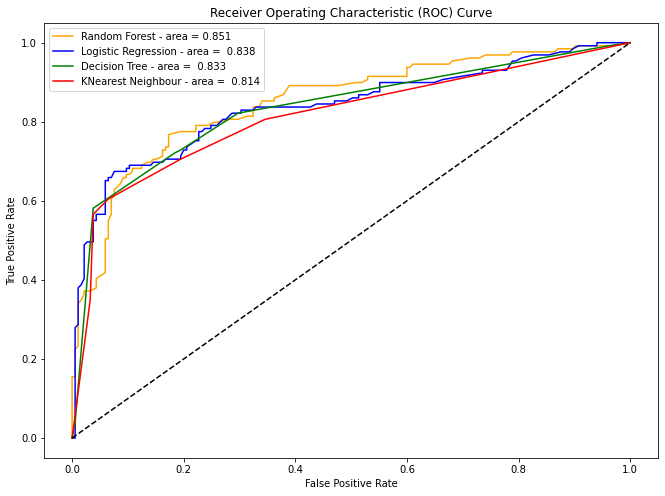

In [49]:
#plot roc curve 
plt.figure(figsize=(11,8))
plt.plot(RFC_fp, RFC_tp, color='orange', label=f'Random Forest - area = {aucRF.round(3)}')
plt.plot(LR_fp, LR_tp, color='blue', label=f'Logistic Regression - area =  {aucLR.round(3)}')
plt.plot(clf_fp, clf_tp, color='green', label=f'Decision Tree - area =  {aucClf.round(3)}')
plt.plot(KNN_fp, KNN_tp, color='red', label=f'KNearest Neighbour - area =  {aucKNN.round(3)}')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Question 4

In [54]:
red_wine = pd.read_csv("winequality-red.csv", delimiter = ";")
white_wine = pd.read_csv("winequality-white.csv", delimiter = ";")

red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [55]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [56]:
X_red_wine = red_wine[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]]
y_red_wine = red_wine.quality

In [230]:
param_grid = { 'min_samples_leaf': np.arange(1, 21, 1),  'n_estimators': np.arange(100, 500, 10)}

rfC = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 10, n_jobs = -1, verbose = 2)

grid_search.fit(X_red_wine, y_red_wine)


Fitting 10 folds for each of 800 candidates, totalling 8000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 31.9min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 34.9min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 39.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 43.3min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 49.0min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 55.6min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 63.8min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 71.3min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 80.5min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 90.3min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 100.2min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed: 110.5min
[Parallel(n_jobs=-1)]: Done 6829 tasks      | elapsed: 122.0min
[Parallel(n_jobs=-1)]: Done 7922 tasks      | elapsed: 133.4min
[Parallel(n_jobs=-1)]: Done 8000 out of 800

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'n_estimators': array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220,
       230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350,
       360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480,
       490])},
             verbose=2)

In [236]:
grid_search.best_params_

{'min_samples_leaf': 11, 'n_estimators': 120}

In [72]:
rfC = RandomForestRegressor(min_samples_leaf = 11, n_estimators = 120)

In [73]:
rfC.fit(X_red_wine, y_red_wine)


RandomForestRegressor(min_samples_leaf=11, n_estimators=120)

In [74]:
rfCpred = rfC.predict(X_red_wine)

In [81]:
rCr2 = r2_score(y_red_wine, rfCpred, multioutput='variance_weighted')
rCmse = int(mean_squared_error(y_red_wine, rfCpred, multioutput='raw_values'))

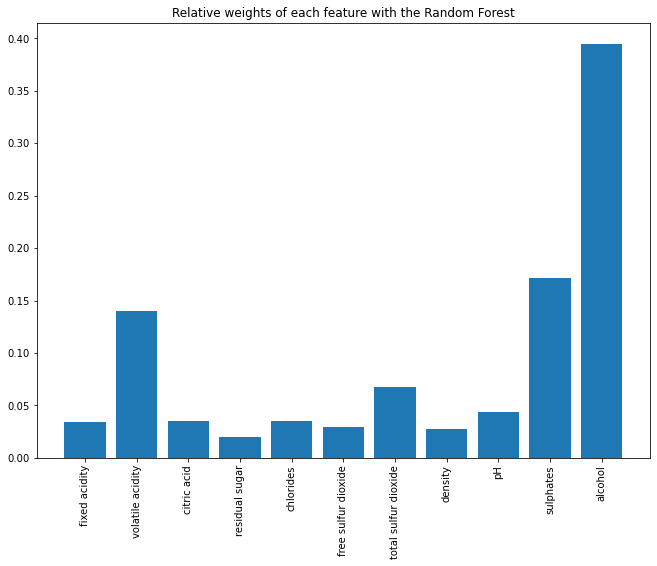

In [76]:
columns = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]
plt.figure(figsize =(11,8))
plt.bar(columns, rfC.feature_importances_)
plt.xticks(rotation = 90)
plt.title("Relative weights of each feature with the Random Forest")
plt.show()

Text(0.5, 1.0, 'Relative weights of each feature with Lasso')

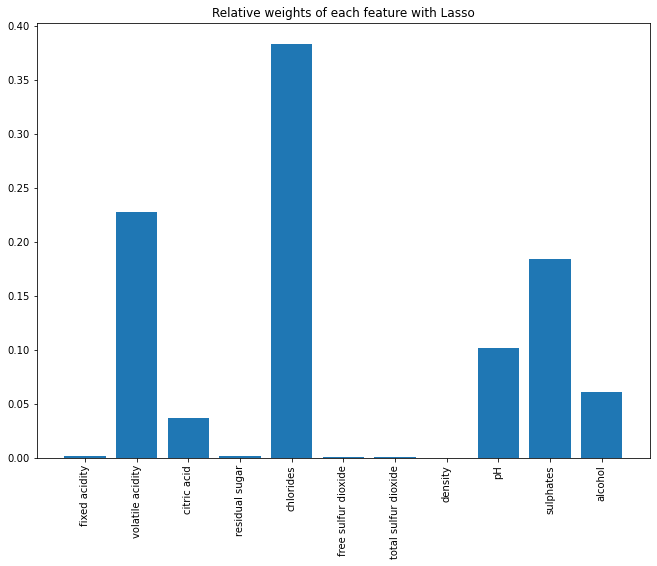

In [77]:
model = Lasso(alpha = 0.0001)
model.fit(X_red_wine, y_red_wine)

columns = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar",
           "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]

weights = []
rescaled = []

for i in model.coef_:
    weights.append(abs(i))
    
for i in weights:
    rescaled.append((i/sum(weights)))
plt.figure(figsize = (11, 8))
plt.bar(columns, rescaled)
plt.xticks(rotation = 90)
plt.title("Relative weights of each feature with Lasso")

In [66]:
LR = LinearRegression()
LR.fit(X_red_wine, y_red_wine)
y_pred = LR.predict(X_red_wine)
LRr2 = r2_score(y_red_wine, y_pred, multioutput='variance_weighted')
LRmse = mean_squared_error(y_red_wine, y_pred)

In [92]:
KNN = KNeighborsRegressor(n_neighbors=14)
KNN.fit(X_red_wine, y_red_wine)
y_pred = KNN.predict(X_red_wine)
KNNr2 = r2_score(y_red_wine, y_pred, multioutput='variance_weighted')
KNNmse = int(mean_squared_error(y_red_wine, y_pred, multioutput='raw_values'))

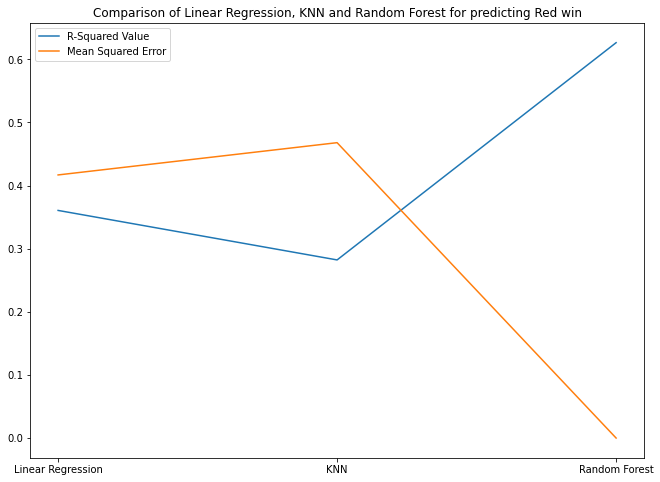

In [88]:
columns = ["Linear Regression", "KNN", "Random Forest"]
plt.figure(figsize = (11, 8))
plt.plot(columns, [LRr2, KNNr2, rCr2], label = "R-Squared Value")
plt.plot(columns, [LRmse, KNNmse, rCmse], label = "Mean Squared Error")
plt.title("Comparison of Linear Regression, KNN and Random Forest for predicting Red win")
plt.legend()
plt.show()